In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



import pandas as pd


In [2]:
df1 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP1.csv')
df2 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP2.csv')
df3 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP3.csv')
df4 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP4.csv')
df5 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP5.csv')

df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [3]:
# Check shape before cleaning
df.shape[0]

2395

In [4]:
# Remove rows with missing values in key numeric columns
df = df.dropna(subset=[
    "Protein", "Fat", "Carbohydrates", "Caloric Value",
    "Sugars", "Dietary Fiber", "Saturated Fats",
    "Monounsaturated Fats", "Polyunsaturated Fats",
    "Sodium", "Potassium"
])

In [5]:
# Check shape after cleaning - We're expecting the same number of rows since the dataset seems complete
df.shape[0]


2395

In [6]:
# Prepare feature matrix X using relevant nutritional columns
feature_cols = [
    "Protein", "Fat", "Carbohydrates", "Caloric Value",
    "Sugars", "Dietary Fiber", "Saturated Fats",
    "Monounsaturated Fats", "Polyunsaturated Fats",
    "Sodium", "Potassium"
]

X = df[feature_cols]


In [7]:
# Explore basic statistics of key nutritional columns
df[["Protein", "Fat", "Carbohydrates", "Caloric Value"]].describe()


,Protein,Fat,Carbohydrates,Caloric Value
count,2395.000000,2395.000000,2395.000000,2395.000000
mean,13.400777,10.176276,18.589021,223.769520
std,32.294246,29.008915,29.406134,384.728244
min,0.000000,0.000000,0.000000,0.000000
25%,0.800000,0.300000,0.500000,44.500000
50%,3.500000,2.100000,6.800000,117.000000
75%,13.300000,9.400000,25.050000,258.000000
max,560.300000,550.700000,390.200000,6077.000000


In [8]:
# Test filtering for high-protein, high-carb foods
# df[(df["Protein"] >= 10) & (df["Carbohydrates"] >=30)].filter(items=["food", "Protein", "Carbohydrates", "Caloric Value"])

In [9]:
# Assign labels or target variable y

def assign_label(row):
    # Muscle Gain
    if row["Protein"] >= 15 or (row["Protein"] >= 10 and row["Caloric Value"] >= 200):
        return "Muscle Gain"

    # Endurance
    if row["Carbohydrates"] >= 30 or row["Sugars"] >= 12 or \
       (row["Carbohydrates"] >= 20 and row["Sodium"] >= 140):
        return "Endurance"

    # Weight Loss
    if (row["Caloric Value"] < 150) and (row["Fat"] < 5) and (row["Carbohydrates"] < 20 or row["Dietary Fiber"] >=3):
        return "Weight Loss"

    # Default
    return "No Category"


In [10]:
df["Label"] = df.apply(assign_label, axis=1)
df["Label"].value_counts()

Label
Weight Loss    1016
Muscle Gain     649
Endurance       386
No Category     344
Name: count, dtype: int64

In [11]:
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Label
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,No Category
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,No Category
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,Weight Loss
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,Weight Loss
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,Weight Loss


In [12]:
# Create training data excluding "No Category"
train_df = df[df["Label"] != "No Category"].copy()

# Assign feature matrix X and target vector y for training
X = train_df[feature_cols].values
y = train_df["Label"].values

# Use LabelEncoder to convert string labels to integers
le = LabelEncoder()

# Fit and transform the labels - This will assign integer labels automatically
y_encoded = le.fit_transform(y)

# Show list of classes
list(le.classes_)

['Endurance', 'Muscle Gain', 'Weight Loss']

In [13]:
# Use StandardScaler to standardize features
scaler = StandardScaler()

# Compute mean and standard deviation of each feature and scale each row
X_scaled = scaler.fit_transform(X)

In [14]:
# Test 20% of data
# Stratify to maintain class distribution in train and test sets to keep ratio of classes
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [42]:
param_combinations = [
    # format: number of neurons, alpha, learning rate

    # One hidden layer configurations
    ((50,), 0.0001, 0.001),
    ((100,), 0.0001, 0.001),
    ((200,), 0.001, 0.0005),

    # Two hidden layer configurations
    ((100, 50), 0.0005, 0.001),
    ((150, 75), 0.0005, 0.0005),

    # 100-50 was the best, but let's try other closer parameters
    ((80, 40), 0.0005, 0.001),
    ((120, 60), 0.0005, 0.001),
    ((100, 50), 0.0003, 0.001),
    ((100, 50), 0.0007, 0.001),
    ((100, 50), 0.0005, 0.0008),
    ((100, 50), 0.0005, 0.002),

    # Three hidden layer configuration
    ((100, 50, 25), 0.0005, 0.001),
    ((100, 50, 50), 0.0005, 0.001),
    ((100, 50, 50), 0.0005, 0.002),
    ((100, 50, 50), 0.0003, 0.002),
    ((100, 50, 50), 0.0007, 0.002),
    ((100, 50, 50), 0.0005, 0.0015),
    ((100, 50, 50), 0.0005, 0.0025),

]

print("Testing different parameters for MLPClassifier:")

for hls, alpha, lr in param_combinations:
    clf = MLPClassifier(
        hidden_layer_sizes=hls,
        alpha=alpha,
        learning_rate_init=lr,
        max_iter=500,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=15
    )
    scores = cross_val_score(clf, X_scaled, y_encoded, cv=5)
    print(f"hls={hls}, alpha={alpha}, lr={lr}, CV accuracy={scores.mean():.4f}")


Testing different parameters for MLPClassifier:
hls=(50,), alpha=0.0001, lr=0.001, CV accuracy=0.9166
hls=(100,), alpha=0.0001, lr=0.001, CV accuracy=0.9386
hls=(200,), alpha=0.001, lr=0.0005, CV accuracy=0.9332
hls=(100, 50), alpha=0.0005, lr=0.001, CV accuracy=0.9503
hls=(150, 75), alpha=0.0005, lr=0.0005, CV accuracy=0.9200
hls=(80, 40), alpha=0.0005, lr=0.001, CV accuracy=0.9459
hls=(120, 60), alpha=0.0005, lr=0.001, CV accuracy=0.9508
hls=(100, 50), alpha=0.0003, lr=0.001, CV accuracy=0.9522
hls=(100, 50), alpha=0.0007, lr=0.001, CV accuracy=0.9517
hls=(100, 50), alpha=0.0005, lr=0.0008, CV accuracy=0.9532
hls=(100, 50), alpha=0.0005, lr=0.002, CV accuracy=0.9630
hls=(100, 50, 25), alpha=0.0005, lr=0.001, CV accuracy=0.9503
hls=(100, 50, 50), alpha=0.0005, lr=0.001, CV accuracy=0.9615
hls=(100, 50, 50), alpha=0.0005, lr=0.002, CV accuracy=0.9639
hls=(100, 50, 50), alpha=0.0003, lr=0.002, CV accuracy=0.9654
hls=(100, 50, 50), alpha=0.0007, lr=0.002, CV accuracy=0.9659
hls=(100, 50,

In [49]:
# Choose best parameters based on CV results 
# Increasing the size of the network to 3 layers improved performance slightly
# Increasing alpha slightly also helped reduce overfitting
# Increasing the size of the third layer from 25 to 50 neurons improved performance slightly

clf = MLPClassifier(
    hidden_layer_sizes=(100, 50, 50),
    alpha=0.0007,
    learning_rate_init=0.002,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=15
)

clf.fit(X_train, y_train)


MLPClassifier(alpha=0.0007, early_stopping=True,
              hidden_layer_sizes=(100, 50, 50), learning_rate_init=0.002,
              max_iter=500, n_iter_no_change=15, random_state=42)

Accuracy: 0.9683698296836983
F1 Score (macro): 0.9548260687273652

Classification Report:
               precision    recall  f1-score   support

   Endurance       0.98      0.84      0.91        77
 Muscle Gain       0.93      0.99      0.96       130
 Weight Loss       0.99      1.00      0.99       204

    accuracy                           0.97       411
   macro avg       0.97      0.95      0.95       411
weighted avg       0.97      0.97      0.97       411

Confusion Matrix (rows = true labels, columns = predicted labels):
             Endurance  Muscle Gain  Weight Loss
Endurance           65            9            3
Muscle Gain          1          129            0
Weight Loss          0            0          204


<Figure size 600x400 with 0 Axes>

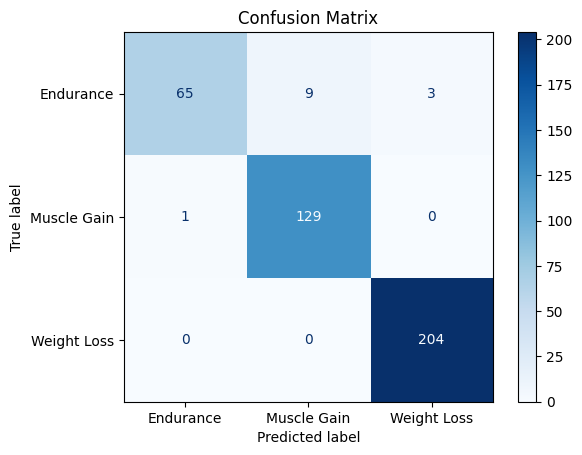

In [60]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix (numeric)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix (rows = true labels, columns = predicted labels):")
print(pd.DataFrame(cm, index=le.classes_, columns=le.classes_))

# Confusion Matrix (plot)
plt.figure(figsize=(6,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()



In [51]:
scores = cross_val_score(clf, X_scaled, y, cv=5)
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9658714616343242


In [52]:
unlabeled_df = df[df["Label"] == "No Category"].copy()
X_unlabeled = unlabeled_df[feature_cols].values
X_unlabeled_scaled = scaler.transform(X_unlabeled)

unlabeled_df["ML_Prediction"] = le.inverse_transform(clf.predict(X_unlabeled_scaled))


In [53]:
print(unlabeled_df.shape)
unlabeled_df.head(100)


(344, 39)


,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Label,ML_Prediction
0,0,0,cream cheese,51,5.0,2.900,1.300,0.200,0.8,0.5,...,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,No Category,Weight Loss
1,1,1,neufchatel cheese,215,19.4,10.900,4.900,0.800,3.1,2.7,...,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,No Category,Muscle Gain
6,6,6,gruyere cheese,116,9.1,5.300,2.800,0.500,0.1,0.1,...,0.094,10.100,0.002,169.400,22.7,0.079,1.100,300.694,No Category,Weight Loss
7,7,7,cheddar cheese,113,9.3,5.300,2.600,0.300,0.9,0.1,...,0.077,7.600,0.063,127.400,21.3,0.009,1.000,215.530,No Category,Weight Loss
12,12,12,swiss cheese,98,7.7,4.600,2.000,0.300,0.4,0.0,...,0.024,8.300,0.062,143.500,18.0,0.031,1.100,237.396,No Category,Weight Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,8,8,whiskey sour,158,0.0,0.018,0.092,0.024,13.9,0.0,...,0.047,1.100,0.010,6.400,5.3,0.030,0.069,16.717,No Category,Weight Loss
560,9,9,tequila sunrise,232,0.2,0.000,0.000,0.000,23.8,0.0,...,0.038,14.800,0.046,21.100,21.1,0.000,1.300,65.357,No Category,Weight Loss
568,17,17,dessert wine sweet,165,0.0,0.000,0.000,0.000,14.1,8.0,...,0.200,9.300,0.100,9.300,94.8,0.060,0.074,22.700,No Category,Weight Loss
571,20,20,late harvest white wine,172,0.0,0.000,0.000,0.000,20.6,0.0,...,0.000,0.000,0.000,0.000,0.0,0.000,0.000,153.600,No Category,Weight Loss


In [61]:
unlabeled_df.to_csv("mlp_unlabeled_with_predictions.csv", index=False)


In [62]:
muscle_gain_df = df[df["Label"] == "Muscle Gain"].copy()
X_muscle_gain = muscle_gain_df[feature_cols].values
X_muscle_gain_scaled = scaler.transform(X_muscle_gain)

muscle_gain_df["ML_Prediction"] = le.inverse_transform(clf.predict(X_muscle_gain_scaled))

In [63]:
muscle_gain_df.to_csv("mlp_muscle_gain_with_predictions.csv", index=False)
